In [4]:
import pandas as pd

# Load the data
file_path = '/Users/sabinbasnet/Desktop/Main/Takeo/MachineLearning/Zillow Prize/Zillow housing data_csv.csv'
data = pd.read_csv(file_path)
#pd.set_option("display.max_rows", None)
data.head() #Displaying first five rows


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#Inspecting Data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [6]:
#check missing values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
#check descriptive statstastics
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
#check for duplicates
duplicates_rows = data.duplicated().sum()
print(duplicates_rows)

0


In [9]:
# There is no missing values so we don't need to handel missing values but if there is any we can follow as below
# Drop rows with any missing values
data_cleaned = data.dropna() #here we are dropping the rows with missing values but we can also add appropriate values (mean, median or mode)

# Verify if there are still missing values
print(data_cleaned.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [10]:
#There is no duplicates but if there are any duplicate values we can handle them by removing 
# Drop duplicates if any
data_cleaned = data_cleaned.drop_duplicates()

# Verify if duplicates are removed
print(f"Number of duplicate rows after cleaning: {data_cleaned.duplicated().sum()}")


Number of duplicate rows after cleaning: 0


In [11]:
#Handeling Outliers
"""Since columns like mainroad, guestroom, and furnishingstatus are categorical, 
So, we should focus on the numeric columns when handling outliers."""

# Select only numeric columns
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Calculate the IQR for numeric columns
Q1 = data_cleaned[numeric_columns].quantile(0.25)
Q3 = data_cleaned[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers for numeric columns only
data_cleaned = data_cleaned[~((data_cleaned[numeric_columns] < (Q1 - 1.5 * IQR)) | 
                              (data_cleaned[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the dataset after removing outliers
print(f"Data shape after outlier removal: {data_cleaned.shape}")

Data shape after outlier removal: (463, 13)


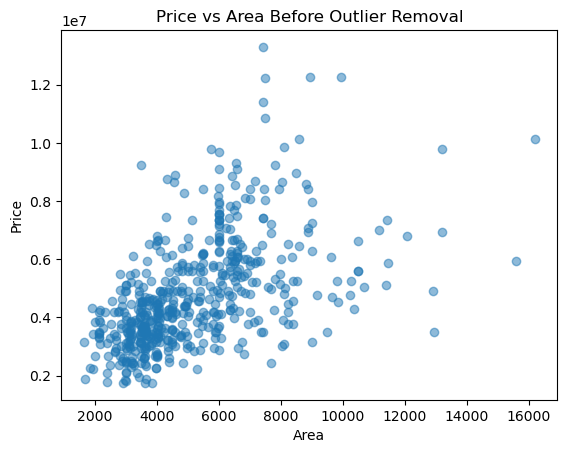

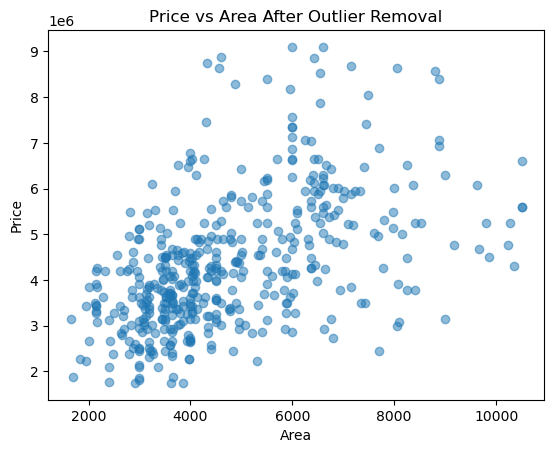

In [39]:
# Scatter plot before outlier removal
plt.scatter(data['area'], data['price'], alpha=0.5)
plt.title('Price vs Area Before Outlier Removal')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# Scatter plot after outlier removal
plt.scatter(data_cleaned['area'], data_cleaned['price'], alpha=0.5)
plt.title('Price vs Area After Outlier Removal')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


In [14]:
#Feature Engineering
#Convert categorical variables into numerical ones using techniques like one-hot encoding
# Use one-hot encoding on the categorical columns
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded data
print(data_encoded.head())


      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
15  9100000  6000         4          1        2        2          True   
16  9100000  6600         4          2        2        1          True   
18  8890000  4600         3          2        2        2          True   
19  8855000  6420         3          2        2        1          True   
20  8750000  4320         3          1        2        2          True   

    guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
15          False          True                False                False   
16           True          True                False                 True   
18           True         False                False                 True   
19          False         False                False                 True   
20          False          True                 True                False   

    prefarea_yes  furnishingstatus_semi-furnished  \
15         False                       

In [15]:
#Creating new feature
# Create a new feature 'price_per_sqft'
data_encoded['price_per_sqft'] = data_encoded['price'] / data_encoded['area']

# Check the newly created feature
print(data_encoded[['price', 'area', 'price_per_sqft']].head())


      price  area  price_per_sqft
15  9100000  6000     1516.666667
16  9100000  6600     1378.787879
18  8890000  4600     1932.608696
19  8855000  6420     1379.283489
20  8750000  4320     2025.462963


In [16]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

# Apply Standardization
scaler = StandardScaler()
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price_per_sqft']  # Include any new features

# Fit and transform the numeric columns
data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])

# Check the standardized data
print(data_encoded[numeric_columns].head())


       price      area  bedrooms  bathrooms   stories   parking  \
15  3.229302  0.687763  1.735836  -0.500988  0.613917  1.822229   
16  3.229302  1.022328  1.735836   1.773105  0.613917  0.532180   
18  3.085816 -0.092888  0.216569   1.773105  0.613917  1.822229   
19  3.061901  0.921958  0.216569   1.773105  0.613917  0.532180   
20  2.990158 -0.249018  0.216569  -0.500988  0.613917  1.822229   

    price_per_sqft  
15        1.605237  
16        1.190050  
18        2.857741  
19        1.191543  
20        3.137348  


In [17]:
#Min-Max normalization
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling
scaler = MinMaxScaler()
data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])

# Check the normalized data
print(data_encoded[numeric_columns].head())

       price      area  bedrooms  bathrooms  stories  parking  price_per_sqft
15  1.000000  0.491525  1.000000        0.0      0.5      1.0        0.701984
16  1.000000  0.559322  1.000000        0.5      0.5      0.5        0.621225
18  0.971429  0.333333  0.666667        0.5      0.5      1.0        0.945613
19  0.966667  0.538983  0.666667        0.5      0.5      0.5        0.621515
20  0.952381  0.301695  0.666667        0.0      0.5      1.0        1.000000


In [18]:
#Data Splitting
#importing required libraries
from sklearn.model_selection import train_test_split
# Define X (features) and y (target)
X = data_encoded.drop('price', axis=1)  # Drop the target variable from the features
y = data_encoded['price']  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to ensure correct splitting
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (370, 14), (370,)
Testing set shape: (93, 14), (93,)


In [19]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
# Make predictions and evaluate the model
y_pred_lr = linear_regressor.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)
# Output the evaluation metrics for the models
print("Linear Regression - RMSE:", rmse_lr, "R²:", r2_lr)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_rf = rf_regressor.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Output the evaluation metrics for the models
print("Random Forest - RMSE:", rmse_rf, "R²:", r2_rf)

Linear Regression - RMSE: 0.08155413544805647 R²: 0.8619941037086363
Random Forest - RMSE: 0.047744971072504146 R²: 0.952700022428666


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
#Below this is just for practice
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define hyperparameter grids for Ridge and Lasso Regression
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize Ridge and Lasso models
ridge_regressor = Ridge()
lasso_regressor = Lasso()

In [25]:
#Perform GridSearchCV for Ridge and Lasso Regression
ridge_grid_search = GridSearchCV(ridge_regressor, ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search = GridSearchCV(lasso_regressor, lasso_params, cv=5, scoring='neg_mean_squared_error')

print(ridge_grid_search)
print (lasso_grid_search)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')
GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')


In [31]:
# Fit the models on the training data
ridge_grid_search.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)

# Get the best models and parameters
best_ridge = ridge_grid_search.best_estimator_
best_lasso = lasso_grid_search.best_estimator_

In [32]:
# Define hyperparameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
#Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

#Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_regressor, rf_params, cv=5, scoring='neg_mean_squared_error')
print(rf_grid_search)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')


In [33]:
# Fit the model on the training data
rf_grid_search.fit(X_train, y_train)

# Get the best model and parameters for Random Forest
best_rf = rf_grid_search.best_estimator_

In [34]:
#Make predictions and evaluate Ridge, Lasso, and Random Forest

# Ridge Regression
y_pred_ridge = best_ridge.predict(X_test)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Regression
y_pred_lasso = best_lasso.predict(X_test)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Random Forest
y_pred_rf_tuned = best_rf.predict(X_test)
rmse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned, squared=False)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

# Output the evaluation metrics for the tuned models
print({
    "Ridge RMSE": rmse_ridge, "Ridge R²": r2_ridge,
    "Lasso RMSE": rmse_lasso, "Lasso R²": r2_lasso,
    "Random Forest RMSE": rmse_rf_tuned, "Random Forest R²": r2_rf_tuned
})

{'Ridge RMSE': 0.08158102004507424, 'Ridge R²': 0.8619031004889245, 'Lasso RMSE': 0.15005474185293274, 'Lasso R²': 0.5327975475848232, 'Random Forest RMSE': 0.048572726858010146, 'Random Forest R²': 0.9510457235146429}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0, 0.5, 'Predicted Prices')

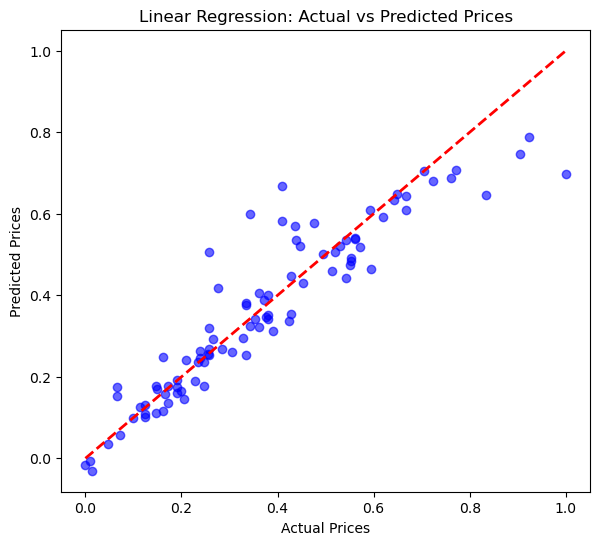

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Visual representation of actual vs predicted values for linear regression models

# Linear Regression
plt.figure(figsize=(15, 6))

# Scatter plot for Linear Regression actual vs predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

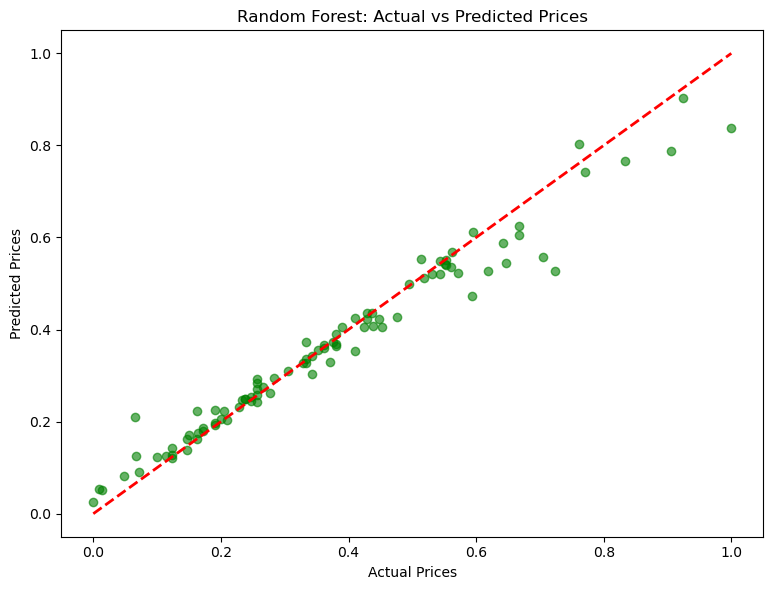

In [38]:
# # Visual representation of actual vs predicted values for Random Forest models 
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Random Forest: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()